In [19]:
%pip install openpyxl
%pip install pandas
%pip install matplotlib

/Users/andreasink/.zshenv:2: permission denied: /Library/Java/JavaVirtualMachines/jdk1.8.0_311.jdk/Contents/Home
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
/Users/andreasink/.zshenv:2: permission denied: /Library/Java/JavaVirtualMachines/jdk1.8.0_311.jdk/Contents/Home
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/p

In [20]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [21]:
# Tuesday, March 22
daysBefore = -5

date_time_str = '2022-03-22 00:00:00.243860'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f').date()

In [22]:
def analyze(file, unit):
    df = pd.read_excel("./" + file + ".xlsx")
    df["startTime"] = pd.to_datetime(df["startDate"]).dt.hour
    df["startDate"] = pd.to_datetime(df["startDate"]).dt.date
    df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week

    # aWeekAgo = pd.to_datetime(datetime.datetime.now() + datetime.timedelta(days= daysBefore))
    aWeekAgo = date_time_obj
    dfBeforeSick = df[df["startDate"] < aWeekAgo]

    dfAfterSick = df[df["startDate"] > aWeekAgo]
    df = df[df["startWeek"] < 14]
    df = df[df["startWeek"] > 3]
    print(unit + " Before Sick: " + str(dfBeforeSick["value"].median()))
    print(unit + " Three days prior to symptoms: " + str(dfAfterSick["value"].median()))
    
    groupedByWeek = df.groupby(df["startWeek"])['value'].median()

    plt.plot(groupedByWeek)



HR Before Sick: 85.0
HR Three days prior to symptoms: 97.0


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


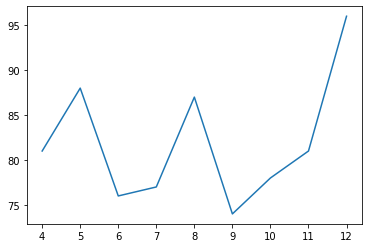

In [23]:
analyze("HRData", "HR")

RR Before Sick: 15.0
RR Three days prior to symptoms: 17.5


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


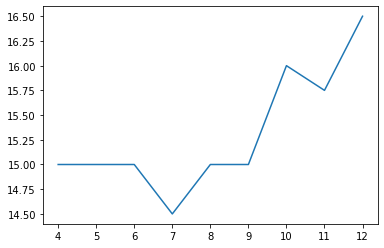

In [24]:
analyze("RRData", "RR")

/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


HRV Before Sick: 28.269905090332
HRV Three days prior to symptoms: 21.7198066711425


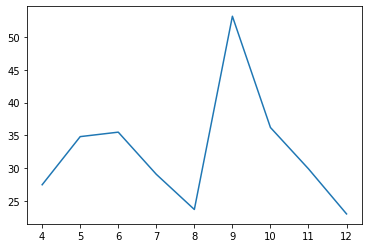

In [25]:
analyze("HRVData", "HRV")

WHR Before Sick: 119.75
WHR Three days prior to symptoms: 124.0


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


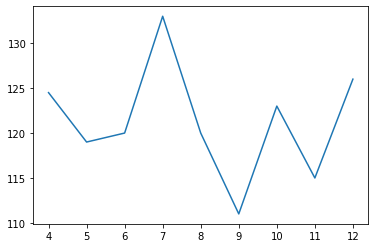

In [26]:
analyze("WalkingHRData", "WHR")

/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


RHR Before Sick: 72.5
RHR Three days prior to symptoms: 74.0


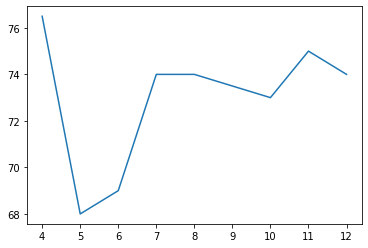

In [27]:
analyze("RestingHRData", "RHR")

Cal Before Sick: 0.061
Cal Three days prior to symptoms: 18.647


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


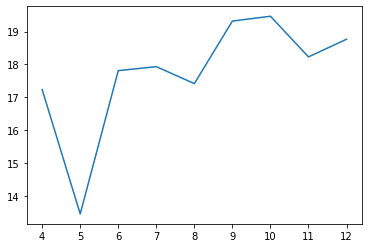

In [28]:
analyze("BasalEnergyData", "Cal")

% Before Sick: 0.0
% Three days prior to symptoms: 0.0


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


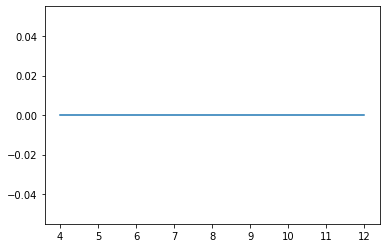

In [29]:
analyze("WalkingAsymData", "%")

Cal Before Sick: 0.164
Cal Three days prior to symptoms: 0.285


/var/folders/6_/rvgp1wdj7f911hdtrpj3tyrw0000gn/T/ipykernel_46136/834468472.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["startWeek"] = pd.to_datetime(df["startDate"]).dt.week


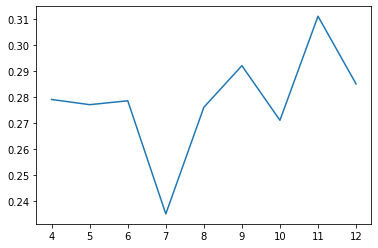

In [30]:
analyze("EnergyBurnedData", "Cal")